# 02 - EDA
___

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import time

from nltk.corpus import stopwords
from datetime import datetime
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

pd.options.display.max_columns = 35

___

In [60]:
# read in our card files
df = pd.read_csv('../Data/cards_cleaned.csv')
df.head()

,name,layout,colors,color_identity,mana_cost,cmc,type_line,card_type,super_type,sub_type,oracle_text,oracle_text_token,legalities,rarity,edhrec_rank,power,toughness,loyalty,card_faces,activated_ability,triggered_ability,oracle_text_back,oracle_text_back_token,colors_back,power_back,toughness_back,loyalty_back,card_type_back,mana_cost_back
0,Static Orb,normal,[],[],{3},3.0,Artifact,Artifact,NONE,NONE,"As long as Static Orb is untapped, players can...",as long as static orb is untapped players can'...,legacy vintage commander duel,rare,1660.0,NONE,NONE,NONE,NONE,0.0,0.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,Sensory Deprivation,normal,['U'],['U'],{U},1.0,Enchantment — Aura,Enchantment,NONE,Aura,Enchant creature Enchanted creature gets -3/-0.,enchant creature enchanted creature gets -3/-0,pioneer modern legacy pauper vintage penny com...,common,17172.0,NONE,NONE,NONE,NONE,0.0,0.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,Road of Return,normal,['G'],['G'],{G}{G},2.0,Sorcery,Sorcery,NONE,NONE,Choose one — • Return target permanent card fr...,choose one return target permanent card from y...,legacy vintage commander duel,rare,5184.0,NONE,NONE,NONE,NONE,0.0,0.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,Storm Crow,normal,['U'],['U'],{1}{U},2.0,Creature — Bird,Creature,NONE,Bird,Flying (This creature can't be blocked except ...,flying this creature can't be blocked except b...,modern legacy pauper vintage penny commander duel,common,10016.0,1,2,NONE,NONE,0.0,0.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,Walking Sponge,normal,['U'],['U'],{1}{U},2.0,Creature — Sponge,Creature,NONE,Sponge,{T}: Target creature loses your choice of flyi...,{t} target creature loses your choice of flyin...,legacy vintage commander duel,uncommon,15762.0,1,1,NONE,NONE,1.0,0.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [75]:
X = df['oracle_text_token']

In [76]:
cvec = CountVectorizer(stop_words=['none'],
                      min_df=2,
                      max_df=.98,
                      ngram_range=(2,5),
                      token_pattern="[a-zA-Z{}+'0-9-/−]+")
X = cvec.fit_transform(X)

In [77]:
oracle_df = pd.DataFrame(X.toarray(), columns=cvec.get_feature_names())
oracle_df

,+0/+1 and,+0/+1 and has,+0/+1 counter,+0/+1 counter on,+0/+1 counters,+0/+1 counters on,+0/+1 for,+0/+1 for each,+0/+1 until,+0/+1 until end,+0/+1 until end of,+0/+1 until end of turn,+0/+1 whenever,+0/+1 whenever a,+0/+2 and,+0/+2 and assigns,+0/+2 and assigns combat,...,−8 target,−8 target opponent,−8 target opponent gets,−8 target opponent gets an,−8 you,−8 you get,−8 you get an,−8 you get an emblem,−9 gain,−9 gain control,−9 gain control of,−9 put,−9 you,−9 you get,−9 you get an,−9 you get an emblem,−x chandra
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
oracle_df.sum().sort_values(ascending=False).head(60)

the battlefield             5077
you control                 3716
you may                     3422
enters the battlefield      3399
enters the                  3399
end of                      3378
until end                   3290
until end of                3290
end of turn                 3283
of turn                     3283
until end of turn           3283
target creature             3031
damage to                   2431
a card                      2296
of your                     2271
your library                2177
at the                      1952
a creature                  1876
if you                      1659
beginning of                1658
the beginning               1658
the beginning of            1658
counter on                  1643
your graveyard              1642
this creature               1618
at the beginning of         1605
at the beginning            1605
your hand                   1430
this turn                   1365
from your                   1351
cast this 

## Word2Vec

In [6]:
# Let's make a list of all the words in our oracle_text
text_list = [text for text in df.loc[df['oracle_text_token'] != 'NONE']['oracle_text_token']]
text_list += [text for text in df.loc[df['oracle_text_back_token'] != 'NONE']['oracle_text_back_token']]

all_oracle_text = ' '.join(text_list)

len(all_oracle_text)

2514518

In [7]:
import gensim.downloader as api

In [8]:
corpus = api.load('text8')

In [9]:
iter(corpus)

<generator object Dataset.__iter__ at 0x1a2ef109a8>

In [10]:
all_oracle_text.split()[:10]

['as',
 'long',
 'as',
 'static',
 'orb',
 'is',
 'untapped',
 'players',
 "can't",
 'untap']

In [11]:
print(next(iter(corpus))[:100])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing']


In [12]:
from gensim.models.word2vec import Word2Vec
Word2Vec()

In [13]:
# Import Word2Vec
from gensim.models.word2vec import Word2Vec

# # If you want to use gensim's data, import their downloader
# # and load it.
# import gensim.downloader as api
# corpus = api.load('text8')

# If you have your own iterable corpus of cleaned data, you can 
# read it in as corpus and pass that in.

# Train a model! 
model = Word2Vec([all_oracle_text.split()],      # Corpus of data.
                 size=300,    # How many dimensions do you want in your word vector?
                 window=5,    # How many "context words" do you want?
                 min_count=1, # Ignores words below this threshold.
                 sg=0,        # SG = 1 uses SkipGram, SG = 0 uses CBOW (default).
                 workers=4)   # Number of "worker threads" to use (parallelizes process).

In [14]:
# Do what you'd like to do with your dataa!
model.most_similar("target")

/Users/Creighton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('creature', 0.999893307685852),
 ('when', 0.9998928904533386),
 ('destroy', 0.9998852014541626),
 ('the', 0.999885082244873),
 ('flying', 0.9998844861984253),
 ('control', 0.9998835325241089),
 ('token', 0.9998815059661865),
 ('with', 0.9998813271522522),
 ('sacrifice', 0.9998809099197388),
 ('gets', 0.9998804926872253)]

In [15]:
model['target']

/Users/Creighton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.25667652,  0.2913786 , -0.02852902,  0.7047089 ,  0.05526997,
       -0.1320338 ,  0.26583874, -0.13278128,  0.02384174, -0.07318512,
        0.00829394, -0.40041843, -0.02121304,  0.052428  ,  0.2749023 ,
        0.30296034,  0.01779742,  0.6699593 ,  0.07992247,  0.02345346,
        0.14487588, -0.00370377, -0.40282366, -0.22209616, -0.01287799,
       -0.12797117,  0.2137008 , -0.26389125,  0.09787047,  0.27676597,
        0.05137702,  0.19819042,  0.6779775 , -0.3529592 , -0.11999386,
       -0.02376126, -0.19549544,  0.25235614,  0.32438216,  0.5445795 ,
       -0.09309651,  0.24032995, -0.22358261, -0.37990108, -0.2180969 ,
        0.09931684, -0.20254758, -0.27095664, -0.14325312, -0.33846334,
        0.40728113, -0.58260006,  0.25496826, -0.7605048 ,  0.10624295,
        0.19982411,  0.00612886,  0.10132181,  0.121696  , -0.3833166 ,
       -0.03678131,  0.07359909,  0.5689314 ,  0.37563318,  0.23596369,
        0.15933235,  0.13371028,  0.29475376,  0.30108896,  0.25

In [16]:
model.vocabulary

In [17]:
# now let's get a list of the vectors for each word in our oracle text
word_vec = [model[word] for word in all_oracle_text.split()]

/Users/Creighton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [18]:
# now let's make a dataframe for our oracle text words and their corresponding vectors
w2vdf = pd.DataFrame.from_dict(dict(zip(all_oracle_text.split(), word_vec))).T
w2vdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
as,-0.321493,0.342892,-0.029693,0.862635,0.075105,-0.166195,0.321241,-0.158628,0.018549,-0.100243,0.012386,-0.477533,-0.032131,0.056736,0.332634,0.361699,0.022068,...,0.167194,0.319461,-0.710150,0.067412,0.100137,-0.001013,0.265839,-0.600811,0.027638,0.116174,-0.108176,-0.082234,-0.529265,-0.154025,-0.117374,-0.493744,0.054333
long,-0.205548,0.216060,-0.018410,0.554116,0.050172,-0.101435,0.204208,-0.106267,0.020275,-0.065495,0.008945,-0.302739,-0.022848,0.042263,0.215422,0.236927,0.011044,...,0.113550,0.212603,-0.455307,0.042382,0.065511,0.006639,0.165255,-0.390213,0.022515,0.072999,-0.063289,-0.049354,-0.343077,-0.098874,-0.078463,-0.326058,0.038992
static,-0.007779,0.004479,-0.004202,0.019789,-0.000866,0.000769,0.003924,-0.003746,0.003091,-0.006535,-0.003963,-0.013040,-0.004505,0.000671,0.003569,0.007678,0.004759,...,0.002859,0.009393,-0.015823,0.000094,0.000878,-0.003452,0.010726,-0.013216,-0.000435,0.006250,-0.000677,-0.003879,-0.011582,0.000831,-0.007470,-0.008269,-0.001775
orb,-0.005103,0.010744,-0.002503,0.019435,0.001229,-0.006223,0.006951,-0.003294,-0.000472,0.000678,0.003861,-0.007708,-0.005428,0.002565,0.008776,0.006777,0.005288,...,0.007710,0.004415,-0.015581,-0.000324,0.001013,0.003606,0.010893,-0.015912,-0.002529,-0.000822,-0.006625,-0.002953,-0.018538,-0.006630,-0.003947,-0.012643,-0.001167
is,-0.273865,0.301280,-0.026403,0.755018,0.059928,-0.147667,0.281223,-0.131319,0.028438,-0.078373,0.009256,-0.423451,-0.025571,0.059134,0.287651,0.319656,0.021767,...,0.139492,0.290566,-0.623978,0.063527,0.088241,0.002139,0.237528,-0.521459,0.021160,0.102184,-0.092756,-0.070205,-0.460083,-0.143658,-0.102972,-0.442382,0.053639


In [19]:
w2vdf.shape

(9769, 100)

In [36]:
t0 = time.time()

# Initialize t-SNE
tsne = TSNE(random_state = 42, perplexity = 5, n_iter=500)

tsne_df = tsne.fit_transform(w2vdf)

print((time.time() - t0)/60)

1.8741582830746968


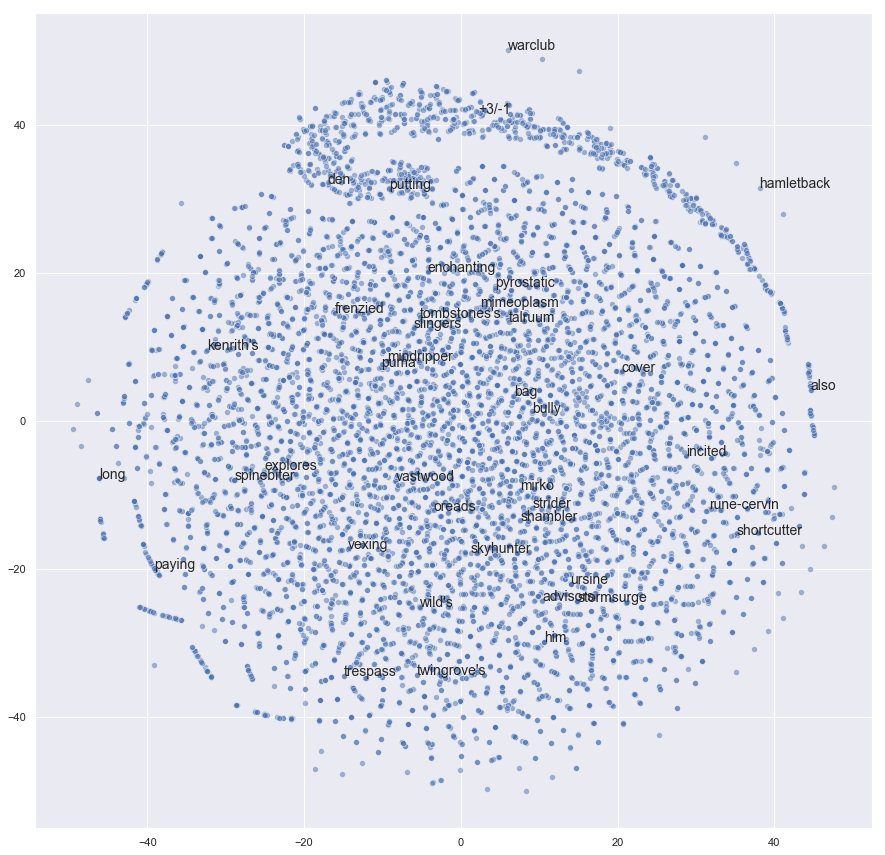

In [37]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# initialize list of texts
texts = []
words_to_plot = list(np.arange(1, w2vdf.shape[0], 250))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], w2vdf.index[word], fontsize = 14))
    